# Stock Analysis & Prediction


## Introduction

##### Software Pre-requisites:
- `pip install finnhub-python`
- `pip install matplotlib`
- `pip install pandas`
- `pip install seaborn`
- `pip install numpy`
- `pip install scikit-learn`


#### How our analysis might fit into an application or investigation

Since we will be analysing Comcast stock to gather insight, we can leverage our findings into our own personal application or investiagation of the stock market by looking for key indicators for buying/selling other stocks, such as competitors, for personal usage. 

#### How our analysis is limited and could be improved

We can only rely on publically availible information which was gathered for free, as such the data set is limited in information compared to pay-to-access options. Since we opted for a free option we only have a years worth of Comcast stock information for our analysis. Additionally, there are several other factors our dataset does not capture in external market factors such as inflation, product launches, industry performance etc. 

#### Who might be interested in our analysis

Stock analysis helps traders to gain an insight into the economy, stock market, or securities. It involves studying the past and present market data and creating a methodology to choose appropriate stocks for trading. Stock analysis also includes the identification of ways of entry into and exit from the investments. Investors or traders make buying or selling decisions based on stock analysis information

#### Selection of data and tooling used for analysis

- FinnHub is the source of the dataset being used for analytics.
- The dataset contains real-time and historical data about the company fundamentals including financial reports, stock price and market sentiments.
- The dataset is an ideal starting point for the long-term stock price prediction or future growth prospects.
- For visualization we worked with Pandas, Matplotlib & Seaborn. 
- As part of this project we worked with Python ML related packages such as Scikit-learn and NumPy to generate forecasting.



#### Dataset
We utilized the dataset we created from our previous DSCI 511 pre-processing class to conduct our analysis.

Our data store is available to view in Google Drive: https://drive.google.com/drive/folders/1hgWRHwlC9thoPKd7-dRqEHTPGYv3LtUk

It contains data from Comcast, its competitors and other top companies within the stock market. We will focus primarily on Comcast (CMCSA stock ticker). We used Finnhub (https://finnhub.io/docs/api/introduction) as the source of our data. Below is a list of the data we generated for analysis:


- Candlestick Data: Daily candlestick data (OHLCV) for stocks.
> candlestick_data.csv

- Company Surprise Earnings: Historical quarterly earnings containing expected and actual earnings
> surprise_earnings.csv

- Recommendation Trends: The latest analyst recommendation trends for a company.
> recommendation_trends.csv

- Insider Sentiment: Insider sentiment for companies using the Monthly Share Purchase Ratio (MSPR). To give investors a glimpse at what the executives are thinking about the stock price and valuation in the near future.
> insider_sentiment.csv

- Insider Transactions: Insider transactions data sourced from Form 3,4,5, SEDI and relevant companies' filings.
> insider_transactions.csv

- Social Media Sentiment: Social sentiment for stocks on Reddit and Twitter.
> social_media_sentiment.csv

- Technical indicators: Stock technical indicator data with price data.
> technical_indicators.csv


#### Project Goal
- The goal of our project is to use the financial data and predict the stock price for CMCSA for the next few days using the python ML Library. We will be using Regression models for predicting the stock price: Linear Regression, Random Forest Regressor and Decision Tree Regression. The goal is to predict the stock price using the model that provides the best score as well as provide a comparative analysis of different models for the problem at hand. 


#### Individual contributions
- Geoff Patton is a software engineer. - Worked on different ML Algorithms using scikit learn for comparative analysis for the stock prices. Participated in team discussions regarding design and strategy.

- Ananda Mahalingam is a Software Engineer.- Worked on modeling the future stock price prediction for CMCSA. Experimented with different algorithms before settling on the appropriate one. Participated in team discussions regarding design and strategy.

- Fengtian Lu is a Software Engineer. - Analyze different ML Algorithms using scikit Learn for comparative study. Participated in team discussions regarding design and strategy.

- Rohit Bhattacharya is an IT analyst. - Worked on EDAs and modeling the future stock price prediction for CMCSA. Participated in team discussions regarding design and strategy.

All members worked on conducting EDA on our exisiting dataset to determine which features to use in our analysis. 

## Exploritory Data Analysis (EDA)

In [167]:
# Imports and constants used by notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sb

# Ticker Symbol of company to analyze
ticker_symbol = 'CMCSA'


#### Stock Price History Chart

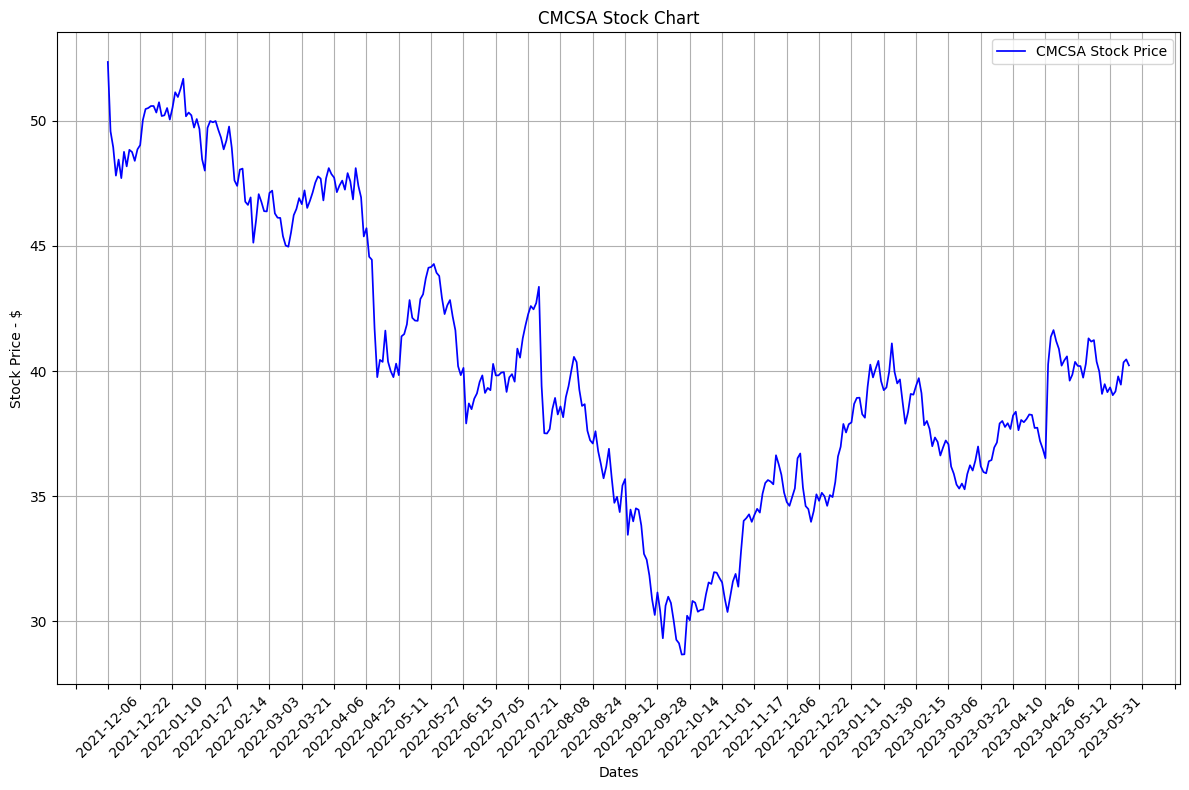

In [168]:

all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Stock Price - $', title=ticker_symbol + ' Stock Chart')

ax.plot(company_stock_data_df['date'], company_stock_data_df['close'], c='b', label=ticker_symbol + ' Stock Price', linewidth=1.25)

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()


#### Dataset Description

In [169]:
print("\nData Frame Shape: ", company_stock_data_df.shape)

print("\nDescribe Data Frame:\n", company_stock_data_df.describe())

print("\nData Frame Null Check:\n", company_stock_data_df.isnull().sum())



Data Frame Shape:  (380, 8)

Describe Data Frame:
           unix_time        open       close        high         low   
count  3.800000e+02  380.000000  380.000000  380.000000  380.000000  \
mean   1.662509e+09   40.247256   40.244316   40.730126   39.774679   
std    1.380313e+07    5.658539    5.665911    5.728555    5.618819   
min    1.638749e+09   28.672000   28.680000   29.150000   28.390000   
25%    1.650564e+09   36.350000   36.287500   36.767500   36.030000   
50%    1.662552e+09   39.330000   39.495000   39.875000   39.014100   
75%    1.674540e+09   45.375000   45.047500   45.830625   44.810850   
max    1.686269e+09   52.300000   52.350000   53.315000   52.060000   

             volume  
count  3.800000e+02  
mean   2.316441e+07  
std    8.179875e+06  
min    9.285440e+06  
25%    1.769146e+07  
50%    2.118310e+07  
75%    2.741703e+07  
max    6.886219e+07  

Data Frame Null Check:
 symbol       0
date         0
unix_time    0
open         0
close        0
high      

#### Histogram to show the distribution of values in each column from the candlestick dataset

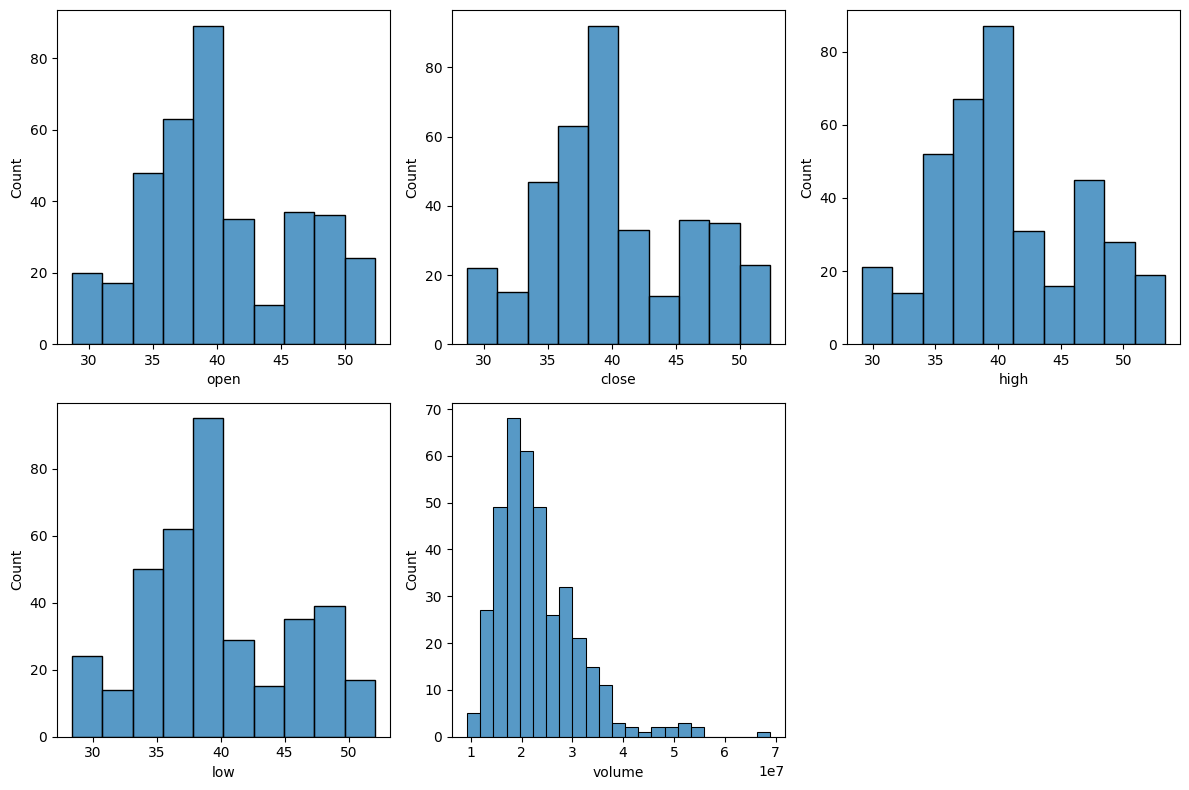

In [170]:
plt.figure(figsize=(12,8),dpi=100)

for i, col in enumerate(['open', 'close', 'high', 'low', 'volume']):
  plt.subplot(2,3,i+1)
  sb.histplot(company_stock_data_df[col])

plt.tight_layout()
plt.show()

#### Boxplot to show the distribution of data from the candlestick dataset

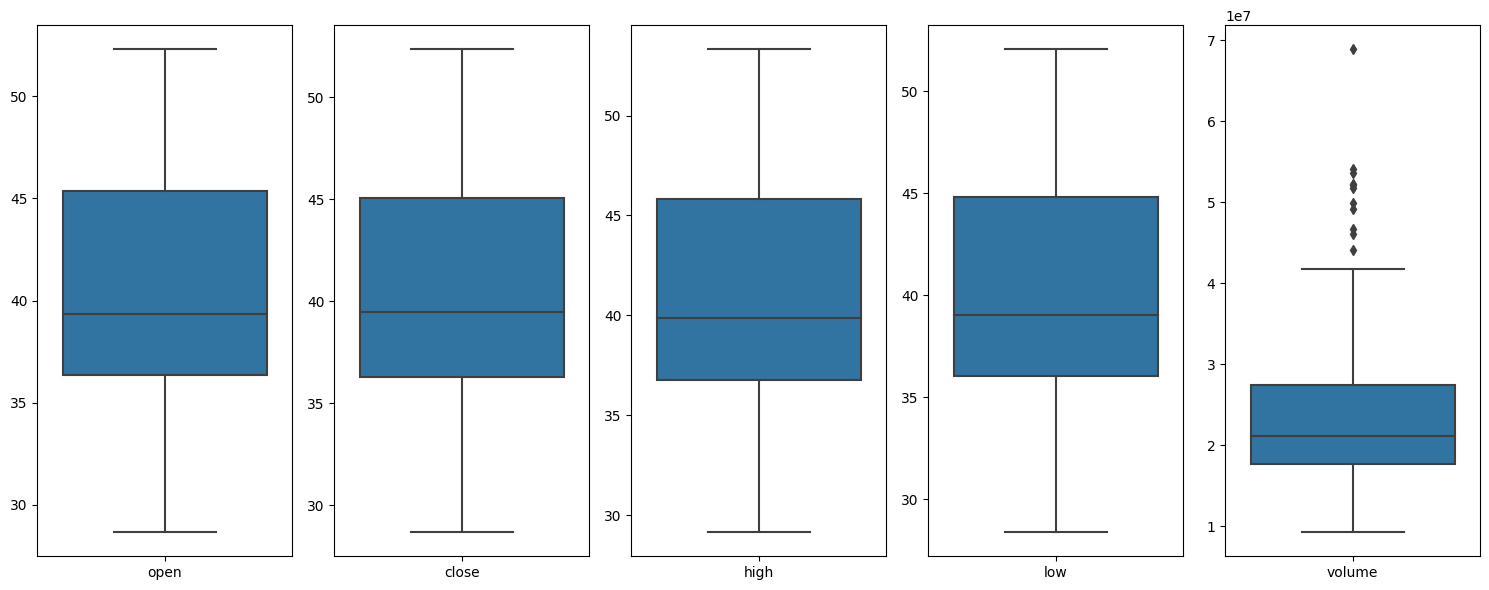

In [171]:
plt.figure(figsize=(15,6),dpi=100)
for i, col in enumerate(['open', 'close', 'high', 'low', 'volume']):
  plt.subplot(1,5,i+1)
  sb.boxplot(company_stock_data_df[[col]])

plt.tight_layout()
plt.show()

#### Stock Price history chart with technical indicators

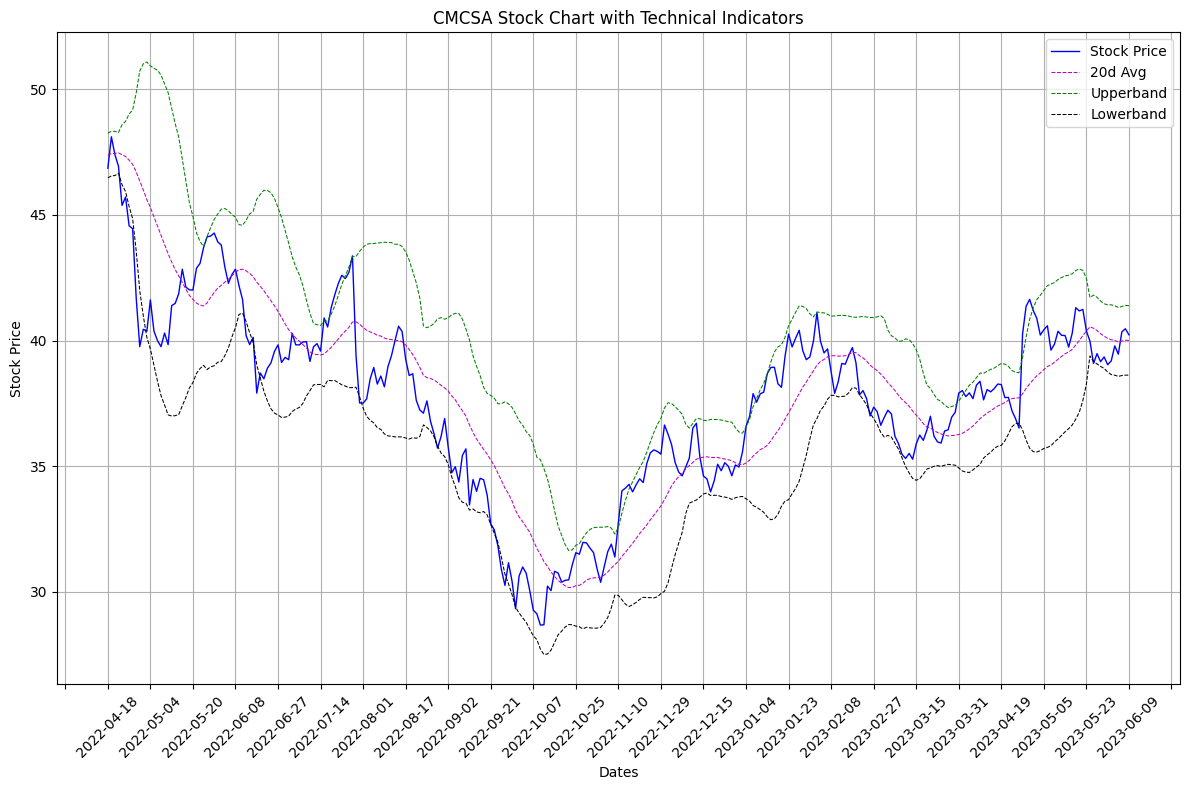

In [172]:
all_stock_df = pd.read_csv('./data/technical_indicators.csv', header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart with Technical Indicators')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Stock Price', c='b', linewidth=1)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()

#### Displays the latest analyst recommendation trends for a company.

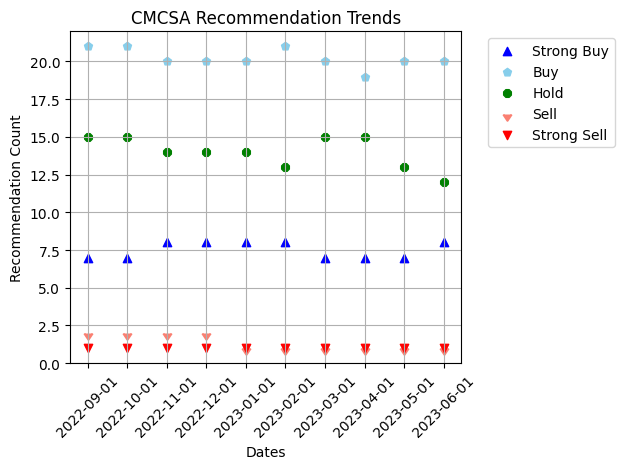

In [173]:
all_trends_df = pd.read_csv('./data/recommendation_trends.csv', header = 0)
stock_trends_df = all_trends_df[all_trends_df['symbol'] == ticker_symbol].sort_values(by=['period'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Recommendation Count', title=ticker_symbol + " Recommendation Trends")

ax.scatter(stock_trends_df['period'], stock_trends_df['strongBuy'], label='Strong Buy', c='b', marker="^")
ax.scatter(stock_trends_df['period'], stock_trends_df['buy'], label='Buy', c='skyblue', marker="p")
ax.scatter(stock_trends_df['period'], stock_trends_df['hold'], label='Hold', c='g', marker="8")
ax.scatter(stock_trends_df['period'], stock_trends_df['sell'], label='Sell', c='salmon', marker=11)
ax.scatter(stock_trends_df['period'], stock_trends_df['strongSell'], label='Strong Sell', c='r', marker="v")

for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#### Displays the historical quarterly earnings surprise for a company.

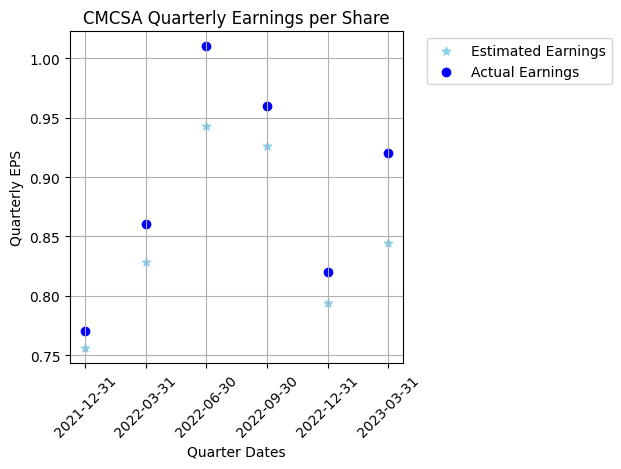

In [174]:
all_earnings_df = pd.read_csv('./data/surprise_earnings.csv', header = 0)
stock_earnings_df = all_earnings_df[all_earnings_df['symbol'] == ticker_symbol].sort_values(by=['period'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Quarter Dates', ylabel='Quarterly EPS', title=ticker_symbol + " Quarterly Earnings per Share")

ax.scatter(stock_earnings_df['period'], stock_earnings_df['estimate'], label='Estimated Earnings', c='skyblue', marker="*")
ax.scatter(stock_earnings_df['period'], stock_earnings_df['actual'], label='Actual Earnings', c='b')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#### Displays the Positive and Negative Mention count from twitter for a company.

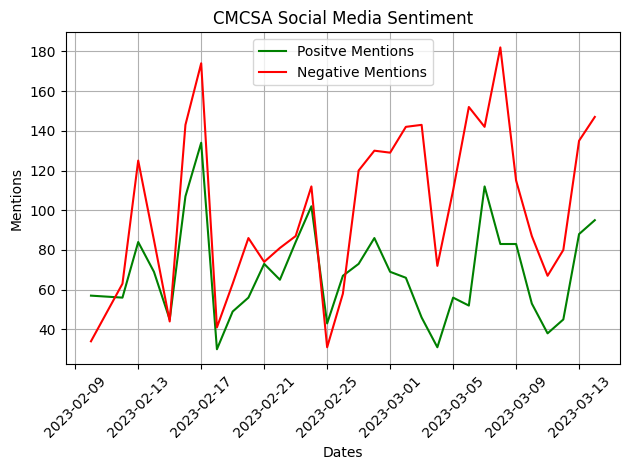

In [175]:
all_social_df = pd.read_csv('./data/social_media_sentiment.csv', header = 0)
company_social_df = all_social_df[all_social_df['symbol'] == ticker_symbol].copy()

company_social_df['date'] = pd.to_datetime(company_social_df['atTime']).dt.date

social_sum = company_social_df.groupby('date', as_index=False)[['positiveMention_twitter','negativeMention_twitter']].sum().tail(32)

ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Mentions', title=ticker_symbol + " Social Media Sentiment")

ax.plot(social_sum['date'], social_sum['positiveMention_twitter'], label='Positve Mentions', c='g')
ax.plot(social_sum['date'], social_sum['negativeMention_twitter'], label='Negative Mentions', c='r')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.legend()
plt.tight_layout()
plt.show()

## Modelling and Prediction
This prediction code is designed to read the candlestick stock information for CMCSA or another company from a .csv file and will predict the 'close' stock price for the past/future. It will also provide a comparative analysis of the actual stock price versus the price predicted by the model. This implementation will also plot the graphs between actual/predicted/future 'close' price for comparison.

#### Random Forest Regressor Prediction

/var/folders/5d/6fdnvcz973j2fw4pfdq95t000000gp/T/ipykernel_75926/4159799389.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast_forest_regressor_df.loc[next_date]['open'] = comcast_forest_regressor_df.loc[current_date]['close']
/var/folders/5d/6fdnvcz973j2fw4pfdq95t000000gp/T/ipykernel_75926/4159799389.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast_forest_regressor_df.loc[next_date]['open'] = comcast_forest_regressor_df.loc[current_date]['close']
/var/folders/5d/6fdnvcz973j2fw4pfdq95t000000gp/T/ipykernel_75926/4159799389.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

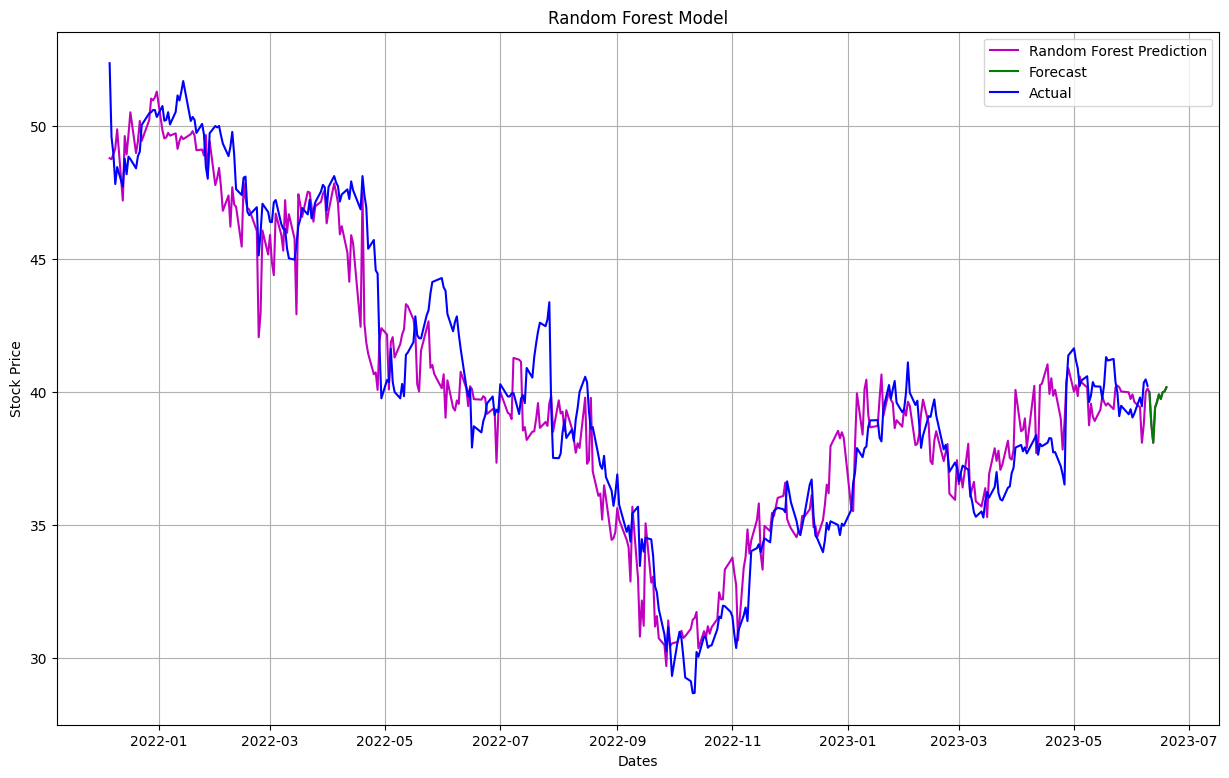

Random Forest Model score: 0.8470173114793702

Actual close Price:
 date
2023-05-26    39.48
2023-05-30    39.16
2023-05-31    39.35
2023-06-01    39.04
2023-06-02    39.19
2023-06-05    39.79
2023-06-06    39.46
2023-06-07    40.35
2023-06-08    40.47
2023-06-09    40.23
Name: close, dtype: float64

Predicted close Price:                   0
date               
2023-05-26  40.0179
2023-05-30  39.9867
2023-05-31  39.7349
2023-06-01  39.9068
2023-06-02  39.6233
2023-06-05  39.4198
2023-06-06  38.0897
2023-06-07  38.7776
2023-06-08  39.9853
2023-06-09  40.1328

Future close Price:                   0
date               
2023-06-10  39.9853
2023-06-11  38.7776
2023-06-12  38.0897
2023-06-13  39.4198
2023-06-14  39.6233
2023-06-15  39.9068
2023-06-16  39.7349
2023-06-17  39.9867
2023-06-18  40.0179
2023-06-19  40.1756


In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import timedelta

predict_days = 10

comcast_forest_regressor_df = company_stock_data_df.copy()
comcast_forest_regressor_df['prediction'] = comcast_forest_regressor_df['close'].shift(-predict_days)

comcast_forest_regressor_df['date'] = pd.to_datetime(comcast_forest_regressor_df['date'])
comcast_forest_regressor_df.index = comcast_forest_regressor_df['date']
comcast_forest_regressor_df = pd.DataFrame(comcast_forest_regressor_df.iloc[:,-5:]).sort_values(by='date')

next_date = comcast_forest_regressor_df.index.max()
prev_date = comcast_forest_regressor_df.index.max()
current_date = next_date

for i in range(predict_days):   
    next_date += timedelta(days=1)
    prev_date -= timedelta(days=1)
    while (prev_date not in comcast_forest_regressor_df.index.values):
        prev_date -= timedelta(days=1)
    comcast_forest_regressor_df.loc[next_date] = comcast_forest_regressor_df.loc[prev_date]
    comcast_forest_regressor_df.loc[next_date]['open'] = comcast_forest_regressor_df.loc[current_date]['close']
    comcast_forest_regressor_df.loc[next_date]['prediction'] = np.nan
    current_date = next_date


X = np.array(comcast_forest_regressor_df.drop('prediction', axis = 1))
X = X[:-predict_days*2] 

y = np.array(comcast_forest_regressor_df['prediction'])
y = y[:-predict_days*2] 


X_train, X_test, y_train_labels, y_test_labels = train_test_split(X,  y, train_size=0.75, test_size=0.25, random_state=0)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train_labels)

X_predict = np.array(comcast_forest_regressor_df.drop('prediction', axis=1))[-predict_days:]

model_predict_prediction = forest_model.predict(X_predict)
model_real_prediction = forest_model.predict(np.array(comcast_forest_regressor_df.drop('prediction', axis=1)))

plt.figure(figsize=(15, 9))
plt.title("Random Forest Model")
plt.ylabel("Stock Price")
plt.xlabel("Dates")

plt.plot(comcast_forest_regressor_df.index[0:], model_real_prediction[0:], label='Random Forest Prediction', color='m')
plt.plot(comcast_forest_regressor_df.index[-predict_days:], model_predict_prediction, label='Forecast', color='green')
plt.plot(comcast_forest_regressor_df.index[0:-predict_days], comcast_forest_regressor_df['close'][0:-predict_days], label='Actual', color='b')
plt.legend()
plt.grid()
plt.show()

# Print Results
print('Random Forest Model score:', forest_model.score(X_test, y_test_labels))
print('\nActual close Price:\n', comcast_forest_regressor_df['close'][0:-predict_days].tail(10))
print('\nPredicted close Price:', pd.DataFrame(model_real_prediction[0:-predict_days][-10:], comcast_forest_regressor_df.index[0:-predict_days][-10:]))
print('\nFuture close Price:', pd.DataFrame(model_predict_prediction, comcast_forest_regressor_df.index[-predict_days:]))


##### Support Methods to plot graphs and calculate metrics

In [177]:
# Support Methods to plot graphs and calculate metrics

from sklearn.metrics import r2_score, mean_squared_error, max_error, mean_absolute_error

def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):
    plt.figure(figsize=(12,8),dpi=100)
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)

    ax.plot(stock_df.index, stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x.index, test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x.index, prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()

regression_metrics = [r2_score, max_error, mean_absolute_error, mean_squared_error]
metric_names = ['R^2 Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error']

def calculate_metrics(text_y, y_pred, model_name):
    print(f"---- Model: {model_name} ----")

    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(text_y, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")

#### Predict Stock price with Tree Models

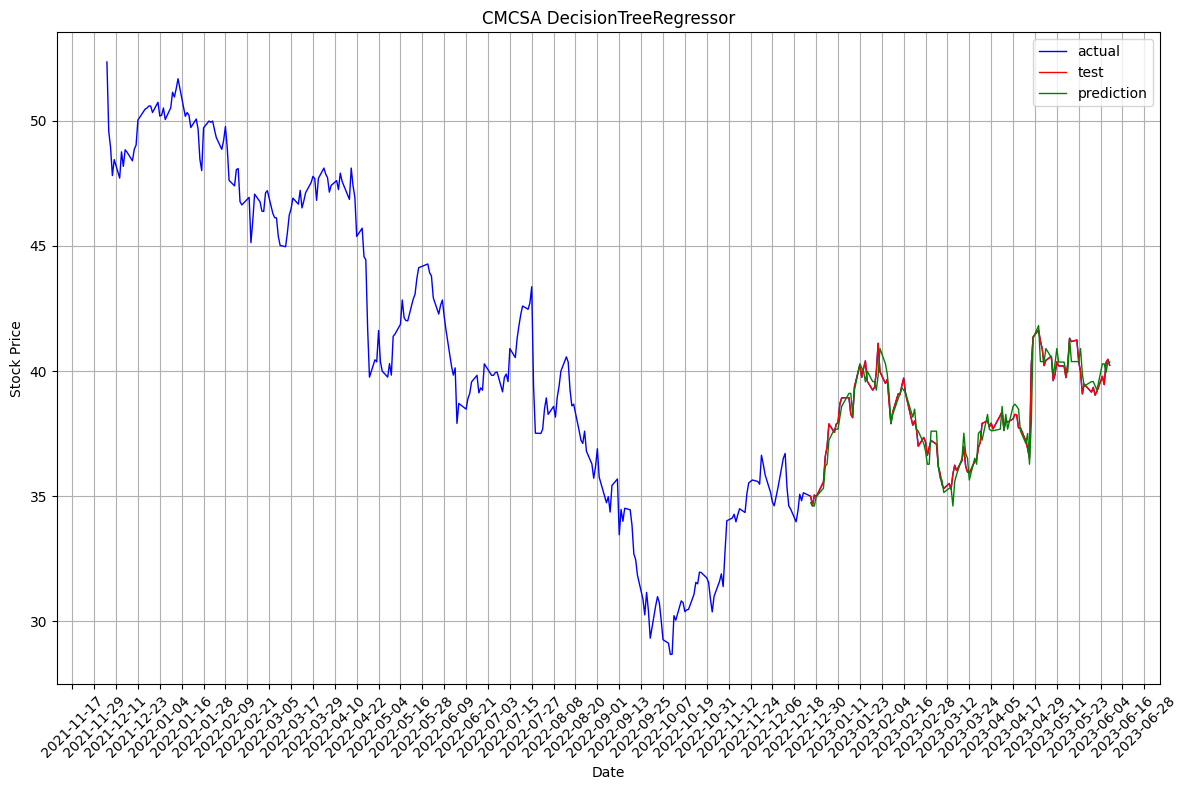

---- Model: CMCSA DecisionTreeRegressor ----
R^2 Score                      0.917737177710798
Max Error                      2.3600000000000065
Mean Absolute Error            0.3674561403508776
Mean Squared Error             0.24575877192982482
----------------------




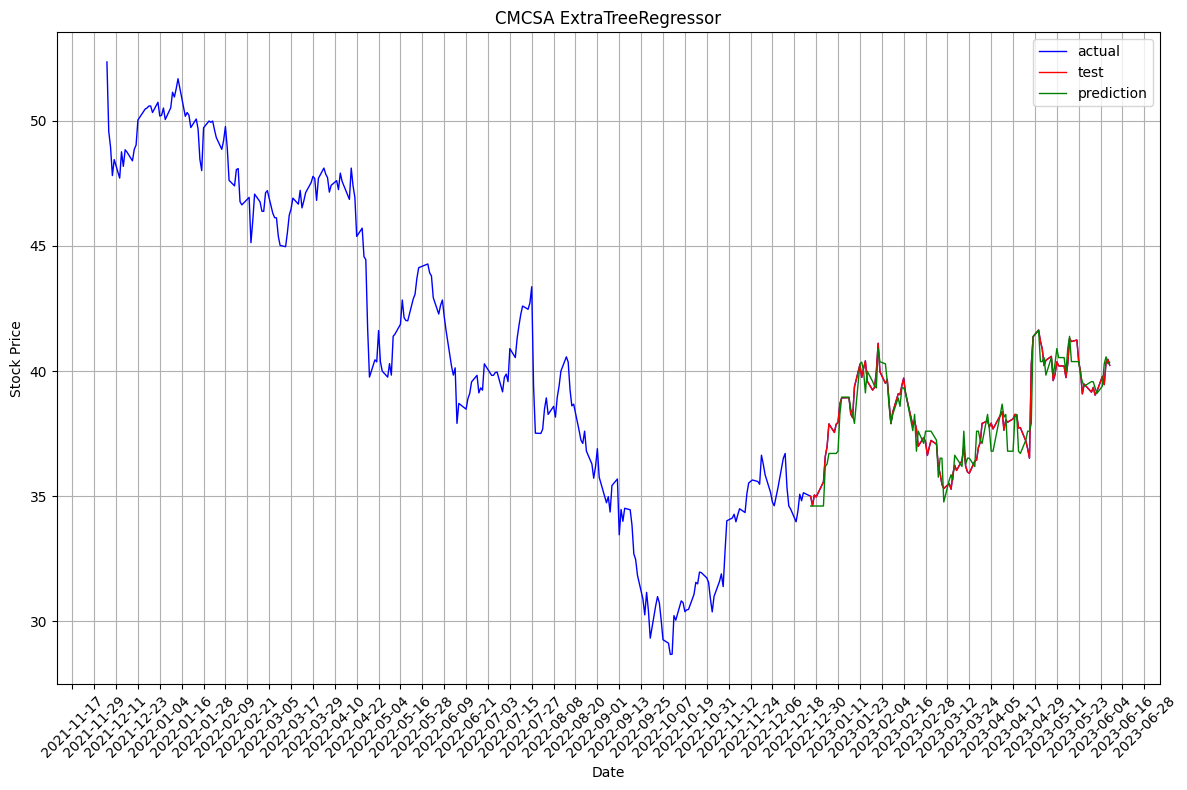

---- Model: CMCSA ExtraTreeRegressor ----
R^2 Score                      0.8747129274039627
Max Error                      2.3600000000000065
Mean Absolute Error            0.4633333333333338
Mean Squared Error             0.3742929824561409
----------------------




In [178]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol','unix_time'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

tree_models = [DecisionTreeRegressor(), ExtraTreeRegressor()]

for model in tree_models:
    trained_model = model.fit(x_train, y_train)
    prediction = trained_model.predict(x_test)
    model_title = ticker_symbol + " " + str(model)[:-2]

    plot_graph(company_stock_data_df, x_test, y_test, prediction, model_title)
    calculate_metrics(y_test, prediction, model_title)


#### Predict Stock price with Linear Models

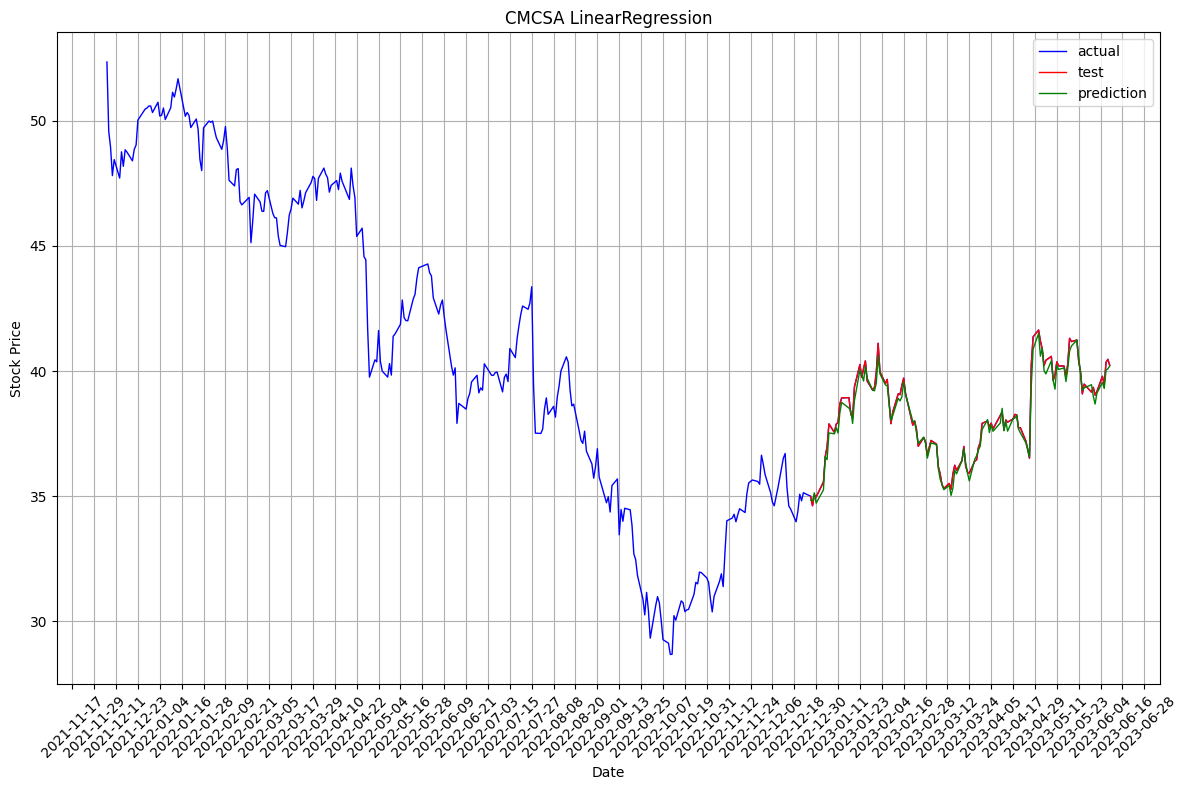

---- Model: CMCSA LinearRegression ----
R^2 Score                      0.97881070015167
Max Error                      0.8478396386463345
Mean Absolute Error            0.19123766669843534
Mean Squared Error             0.06330267019615664
----------------------




In [179]:
from sklearn.linear_model import LinearRegression

all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close']
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

linear_model = LinearRegression()

trained_model = linear_model.fit(x_train, y_train)
prediction = trained_model.predict(x_test)
model_title = ticker_symbol + " " + str(linear_model)[:-2]

plot_graph(company_stock_data_df, x_test, y_test, prediction, model_title)
calculate_metrics(y_test, prediction, model_title)


#### Predict Stock price with Locally-Weighted Linear Regression Model

(114,)


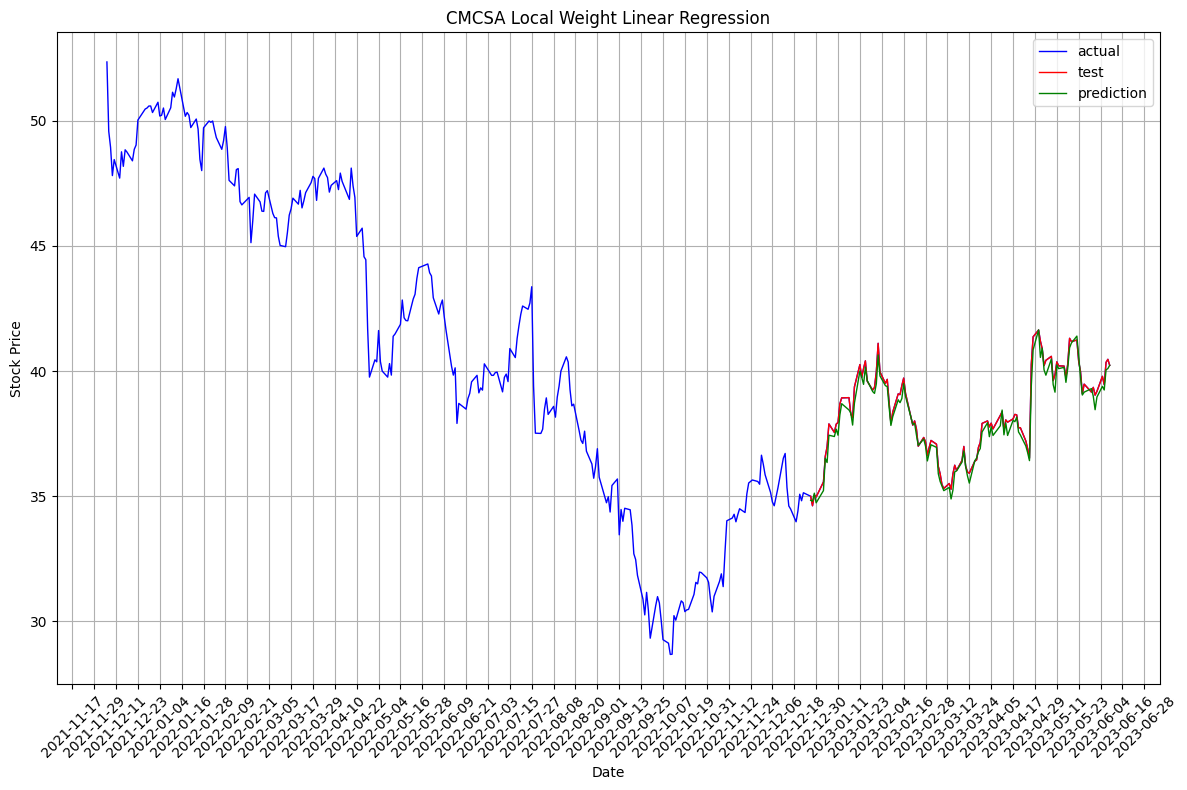

---- Model: CMCSA Local Weight Linear Regression ----
R^2 Score                      0.9699271505136986
Max Error                      0.8680594387200955
Mean Absolute Error            0.23861312257870027
Mean Squared Error             0.0898421225107177
----------------------




In [193]:
# Standardize each column of training and testing data
std_training = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
std_testing = (x_test - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

predictions = []
mse = 0

for _, row_test in std_testing.iterrows():
    w_arr = []
    for _, row_train in std_training.iterrows():
        l1_distance = np.linalg.norm(row_test - row_train, ord=1)
        w = np.exp(-1 * l1_distance)
        w_arr.append(w)
    
    weight = np.diag(w_arr)
    std_training_stack = np.hstack((np.ones((len(std_training), 1)), std_training))
    std_training_transpose = np.transpose(std_training_stack)
    
    coefficients = np.linalg.inv(std_training_transpose @ weight @ std_training_stack) @ std_training_transpose @ weight @ y_train.values
    row_test_with_bias = np.hstack((1, row_test.values))
    pred = np.dot(row_test_with_bias, coefficients)
    predictions.append(pred)

# Convert the predictions list to a numpy array
predictions = np.array(predictions)
print(predictions.shape)

model_title = ticker_symbol + " " + str("Local Weight Linear Regression")
plot_graph(company_stock_data_df, x_test, y_test, predictions, model_title)
calculate_metrics(y_test, predictions, model_title)

#### S-Folds Cross-Validation

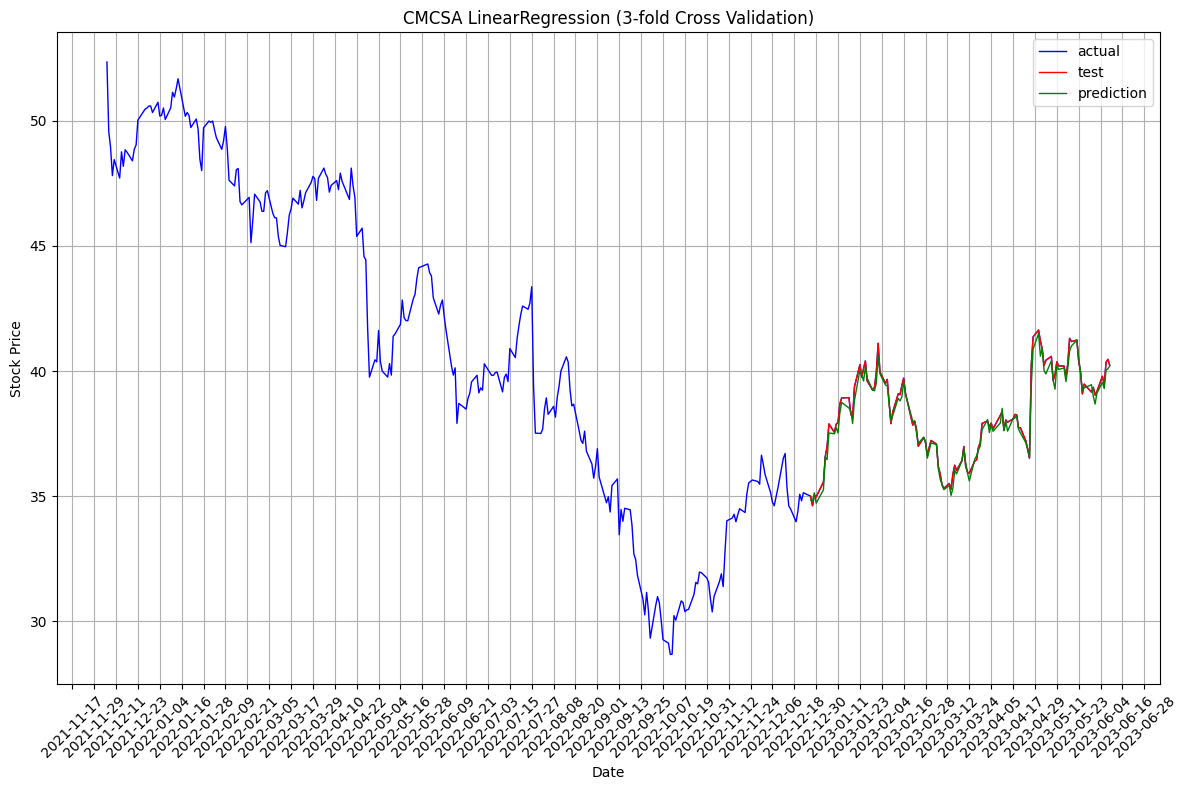

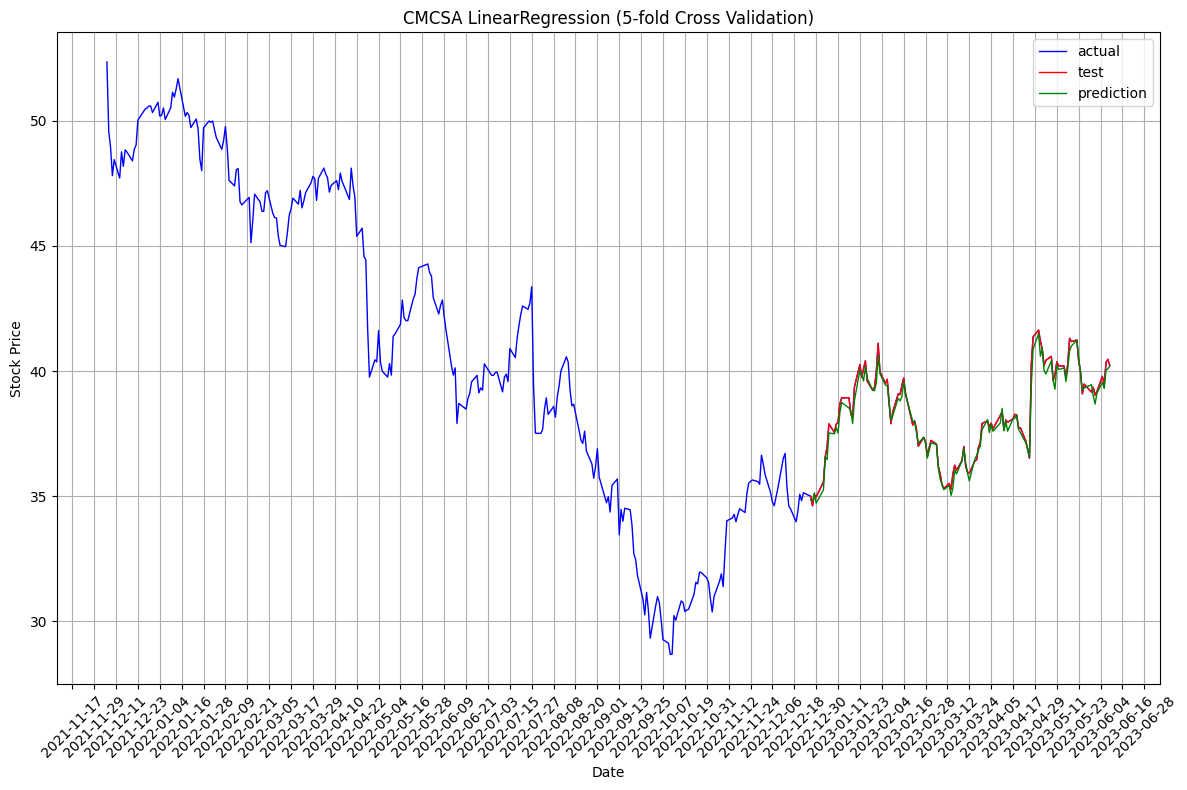

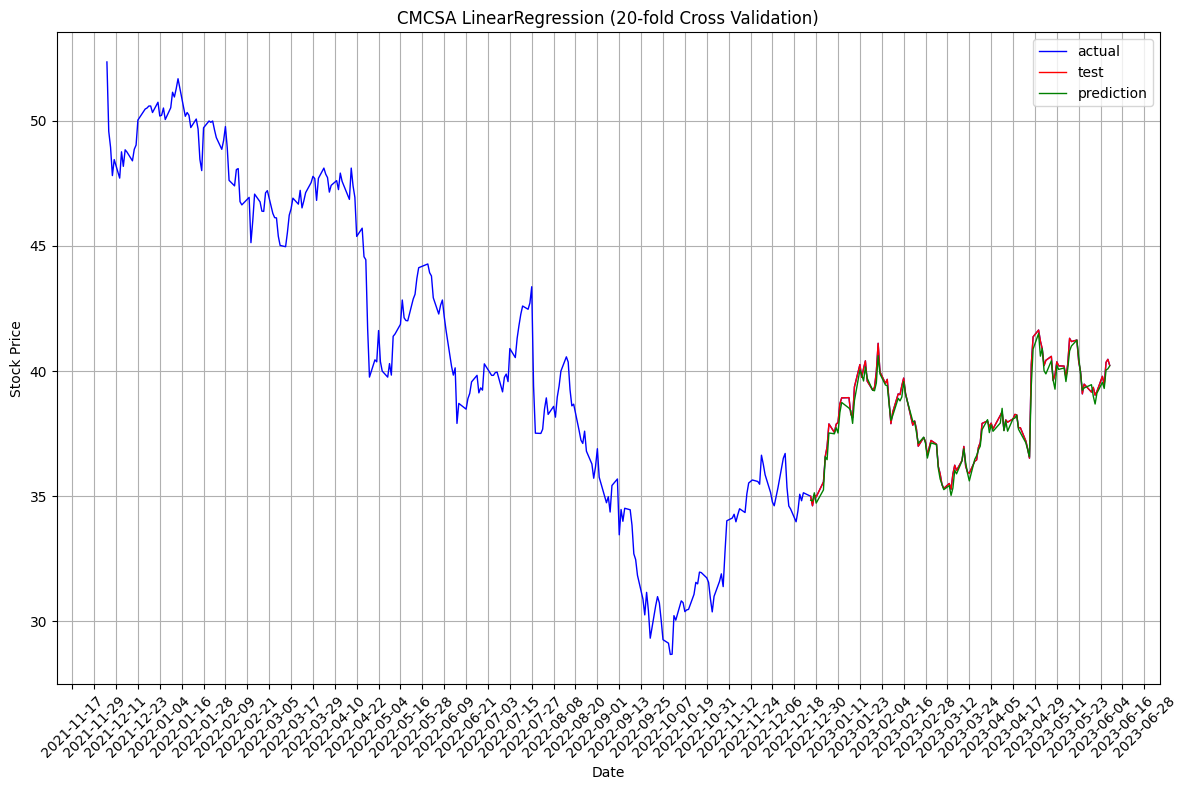

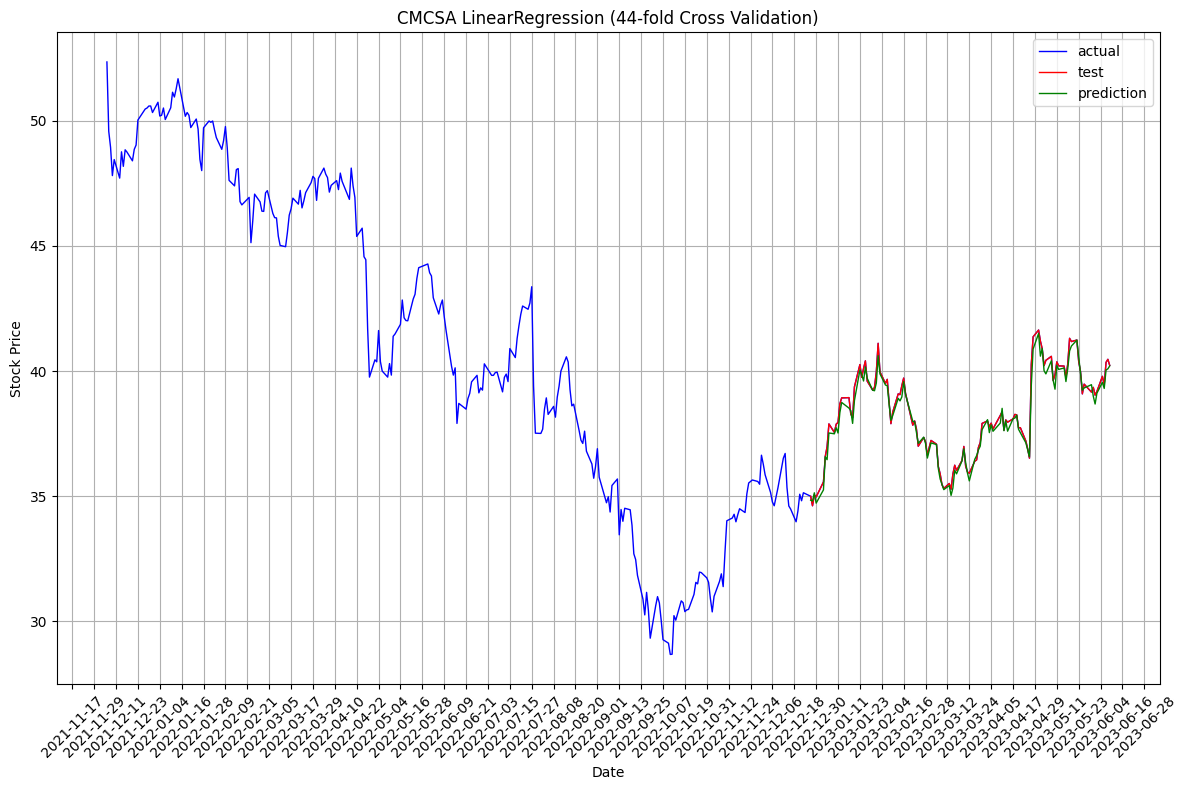

---- Model: CMCSA LinearRegression (3-fold Cross Validation) ----
R^2 Score                      0.97881070015167
Max Error                      0.8478396386463345
Mean Absolute Error            0.19123766669843534
Mean Squared Error             0.06330267019615664
----------------------


---- Model: CMCSA LinearRegression (20-fold Cross Validation) ----
R^2 Score                      0.9788107001516698
Max Error                      0.8478396386463274
Mean Absolute Error            0.19123766669843695
Mean Squared Error             0.06330267019615726
----------------------


---- Model: CMCSA LinearRegression (44-fold Cross Validation) ----
R^2 Score                      0.9788107001516705
Max Error                      0.8478396386463203
Mean Absolute Error            0.19123766669843353
Mean Squared Error             0.0633026701961552
----------------------




In [196]:
def kFold(s):
    predictions = []
    for _ in range(s):
        x_train, x_test, y_train, _ = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

        linear_model = LinearRegression()
        trained_model = linear_model.fit(x_train, y_train)
        prediction = trained_model.predict(x_test)
        predictions.append(prediction)

    return np.array(predictions)

predictions_3_fold = kFold(3)
predictions_20_fold = kFold(20)
predictions_44_fold = kFold(44)

average_predictions_3_fold = np.mean(predictions_3_fold, axis=0)
average_predictions_20_fold = np.mean(predictions_20_fold, axis=0)
average_predictions_44_fold = np.mean(predictions_44_fold, axis=0)

plot_title_3_fold = f"{model_title} (3-fold Cross Validation)"
plot_title_20_fold = f"{model_title} (20-fold Cross Validation)"
plot_title_44_fold = f"{model_title} (44-fold Cross Validation)"

plot_graph(company_stock_data_df, x_test, y_test, average_predictions_3_fold, plot_title_3_fold)
plot_graph(company_stock_data_df, x_test, y_test, average_predictions_20_fold, plot_title_20_fold)
plot_graph(company_stock_data_df, x_test, y_test, average_predictions_44_fold, plot_title_44_fold)

calculate_metrics(y_test, average_predictions_3_fold, plot_title_3_fold)
calculate_metrics(y_test, average_predictions_20_fold, plot_title_20_fold)
calculate_metrics(y_test, average_predictions_44_fold, plot_title_44_fold)

In [181]:
### Next Gen Development Below
all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol'], axis=1)

company_stock_data_df['avg_price'] = company_stock_data_df[['high', 'low']].mean(axis=1)


fin_df = pd.DataFrame()

#### trends
# symbol,period,strongBuy,buy,hold,sell,strongSell

all_trends_df = pd.read_csv('./data/recommendation_trends.csv', header = 0)

trends_df = all_trends_df[all_trends_df['symbol'] == ticker_symbol].sort_values(by=['period'])

trends_df['trend_score'] = (trends_df['strongBuy'] * 1.5) + trends_df['buy'] - (trends_df['sell'] + (trends_df['strongSell'] * 1.5))
trends_df



,symbol,period,strongBuy,buy,hold,sell,strongSell,trend_score
115,CMCSA,2022-09-01,7,21,15,2,1,28.0
114,CMCSA,2022-10-01,7,21,15,2,1,28.0
113,CMCSA,2022-11-01,8,20,14,2,1,28.5
112,CMCSA,2022-12-01,8,20,14,2,1,28.5
111,CMCSA,2023-01-01,8,20,14,1,1,29.5
110,CMCSA,2023-02-01,8,21,13,1,1,30.5
109,CMCSA,2023-03-01,7,20,15,1,1,28.0
108,CMCSA,2023-04-01,7,19,15,1,1,27.0
107,CMCSA,2023-05-01,7,20,13,1,1,28.0
106,CMCSA,2023-06-01,8,20,12,1,1,29.5


In [182]:
#### earnings
# symbol,period,actual,estimate,surprise,surprisePercent

earnings_df = pd.read_csv('./data/surprise_earnings.csv', header = 0)
earnings_df = earnings_df[earnings_df['symbol'] == ticker_symbol]
earnings_df

,symbol,period,actual,estimate,surprise,surprisePercent
69,CMCSA,2023-03-31,0.92,0.8446,0.0754,8.9273
70,CMCSA,2022-12-31,0.82,0.7940,0.0260,3.2746
71,CMCSA,2022-09-30,0.96,0.9262,0.0338,3.6493
72,CMCSA,2022-06-30,1.01,0.9429,0.0671,7.1163
73,CMCSA,2022-03-31,0.86,0.8284,0.0316,3.8146
74,CMCSA,2021-12-31,0.77,0.7559,0.0141,1.8653


In [183]:
#### financials
basic_financials_df = pd.read_csv('./data/basic_company_financials.csv', header = 0)
basic_financials_df = basic_financials_df[basic_financials_df['symbol'] == ticker_symbol]
basic_financials_df


,symbol,10DayAverageTradingVolume,13WeekPriceReturnDaily,26WeekPriceReturnDaily,3MonthAverageTradingVolume,52WeekHigh,52WeekHighDate,52WeekLow,52WeekLowDate,52WeekPriceReturnDaily,...,ebitdPerShareAnnual,enterpriseValue,epsAnnual,epsTTM,pcfShareAnnual,roaTTM,capexCagr5Y,priceRelativeToS&P50052Week,roa5Y,roe5Y
12,CMCSA,24.8552,13.4198,12.1863,19.15372,43.715,2022-07-27,28.39,2022-10-13,-4.623,...,6.2887,263883.44,1.2122,1.319,6.3875,5.22,4.3,-11.7125,4.14,13.04
